In [1]:
import PIL 
from PIL import Image, ImageFilter
import copy
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Read Image
im_rgb = Image.open("highscore_pictures/male/male_rank_8.png")

# Split the image into its respective RGB bands
im_r, im_g, im_b = im_rgb.split()

#Convert image to arrays
im_arr_rgb = np.asanyarray(im_rgb)
im_arr_r = np.asanyarray(im_r)
im_arr_g = np.asanyarray(im_g)
im_arr_b = np.asanyarray(im_b)

# Show images
show = False
if show:
    im_rgb.show()
    im_r.show()
    im_g.show()
    im_b.show()

In [34]:
# Let's play with the Image elements
im_shape = im_arr_rgb.shape
n_pixels = np.prod(im_rgb.size)
rgb = ["R", "G", "B"]

print(n_pixels) # H x W
print(im_shape) # H x W x RGB

# Reshape array
arr_color = np.resize(im_arr_rgb, (3, n_pixels))
arr_pixel = np.resize(im_arr_rgb, (n_pixels, 3))

3145728
(1536, 2048, 3)


In [35]:
# Function to set the image to an usefull numeric format
# numpy and dataframes are created

def image_to_numeric(arr):
    #  Sort and separate 
    pixel_sorted = np.sort(arr, axis=0)
    unique, counts = np.unique(pixel_sorted, return_counts=True, axis=0)
    
    # Create a dataframe for all the unique pixels
    df = pd.DataFrame(unique, columns=rgb)
    df["counts"] = counts
    
    return pixel_sorted, df    

In [36]:
# Check for image quality
arr_pixel_sorted, df_pixel = image_to_numeric(arr_pixel)

# Checking for pixels with at least one RGB value = 0
df_pixel["any0"] = df_pixel[rgb].apply(lambda x: np.any(x==0), axis=1)

# Showing the top 5 colors by number of counts
df_pixel.sort_values(by="counts", ascending=False, inplace=False).head(5)

,R,G,B,counts,any0
90,128,128,128,1114274,False
89,128,128,124,179145,False
99,152,140,128,75879,False
103,160,144,132,71668,False
97,148,136,128,67754,False


Text(0.5, 1.0, 'Count sorted')

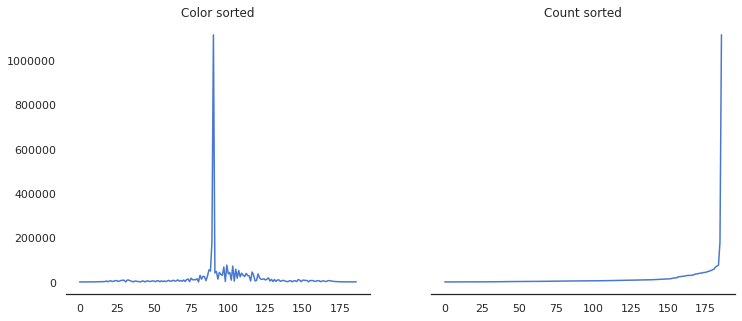

In [37]:
# Plot color counts
sns.set(style="white", palette="muted", color_codes=True)
f, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.despine(left=True)
sns.lineplot(data = df_pixel["counts"], ax=ax[0])
sns.lineplot(data = np.sort(df_pixel["counts"]), ax=ax[1])
ax[0].set_title("Color sorted") # From 0,0,0 to 255,255,255
ax[1].set_title("Count sorted")

In [38]:
def plot_color_bar(cmap, labels):
    # Get figure
    fig, ax = plt.subplots(figsize=(10, 2))
    fig.subplots_adjust(bottom=0.25)
    
    # Calculate bounds and plot image
    bounds = range(cmap.N+1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax=ax,
                                   cmap=cmap,
                                   norm=norm,
                                   boundaries=bounds,
                                   extend="neither",
                                   ticks=None,
                                   ticklocation="top",
                                   drawedges=False,
                                   spacing='uniform',
                                   filled=True,
                                   orientation='horizontal')

    
    
    # Set the HEX name of the colors
    cb.set_ticklabels(labels, update_ticks=True)

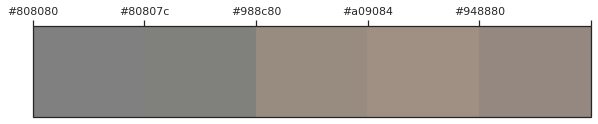

In [39]:
# Get 0-1 rgb colors for cmap
df_cmap = df_pixel.sort_values(by="counts", ascending=False, inplace=False).head(5)[rgb].apply(lambda x: x/255)

# convert rgb colors to hex (use as labels)
hexcol = df_cmap.apply(lambda x: mpl.colors.rgb2hex(x), axis=1)

# Create colormap and plots it
cmap = mpl.colors.ListedColormap(df_cmap.to_numpy())
plot_color_bar(cmap, hexcol.to_numpy())

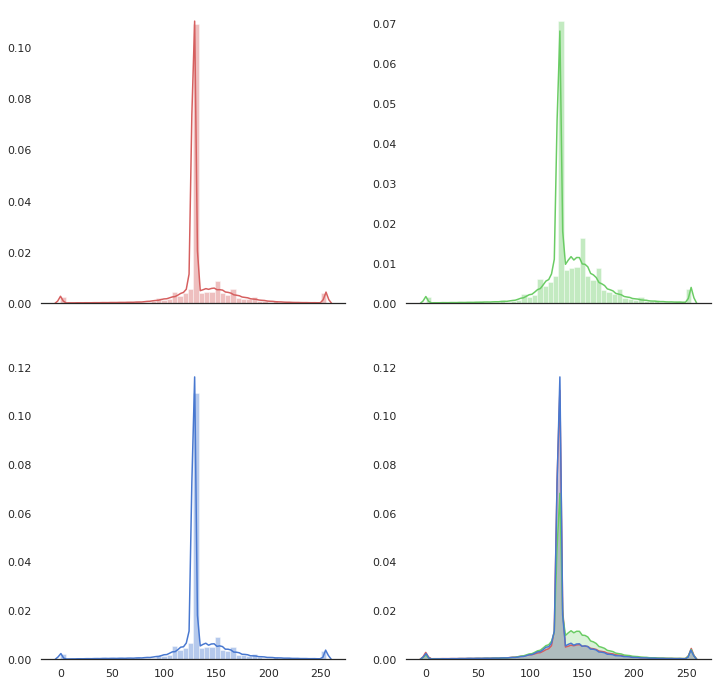

In [40]:
# Plot color distributions for all pixels
sns.set(style="white", palette="muted", color_codes=True)
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(left=True)
sns.distplot(arr_color[0], color="r", ax=ax[0, 0])
sns.distplot(arr_color[1], color="g", ax=ax[0, 1])
sns.distplot(arr_color[2], color="b", ax=ax[1, 0])

# Plot the 3 distributions together
sns.distplot(arr_color[0], color="r", hist=False, kde_kws={"shade": True}, ax=ax[1, 1])
sns.distplot(arr_color[1], color="g", hist=False, kde_kws={"shade": True}, ax=ax[1, 1])
sns.distplot(arr_color[2], color="b", hist=False, kde_kws={"shade": True}, ax=ax[1, 1])

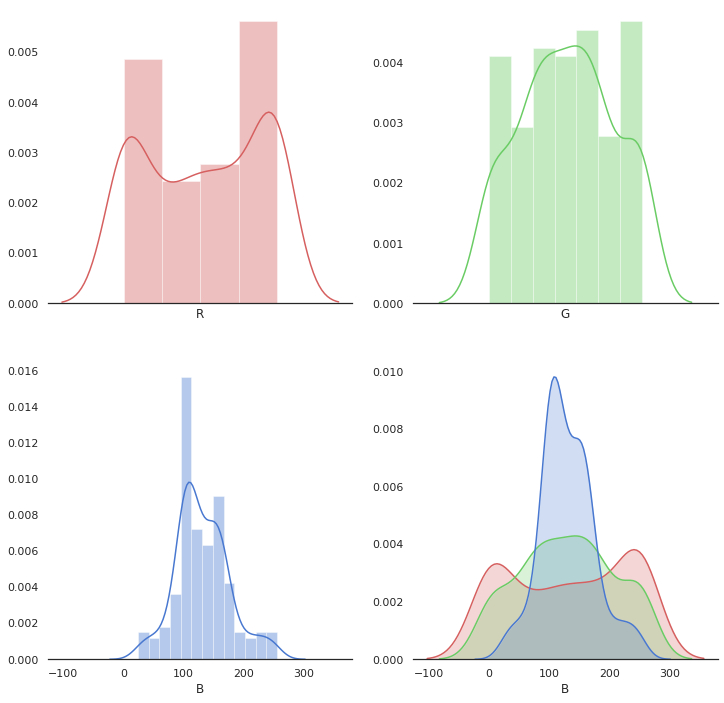

In [41]:
# Plot color distribution for unique pixels
sns.set(style="white", palette="muted", color_codes=True)
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(left=True)
sns.distplot(df_pixel["R"], color="r", ax=ax[0, 0])
sns.distplot(df_pixel["G"], color="g", ax=ax[0, 1])
sns.distplot(df_pixel["B"], color="b", ax=ax[1, 0])

# Plot the 3 distributions together
sns.distplot(df_pixel["R"], color="r", hist=False, kde_kws={"shade": True}, ax=ax[1, 1])
sns.distplot(df_pixel["G"], color="g", hist=False, kde_kws={"shade": True}, ax=ax[1, 1])
sns.distplot(df_pixel["B"], color="b", hist=False, kde_kws={"shade": True}, ax=ax[1, 1])

Text(0.5, 1.0, 'Unique pixels')

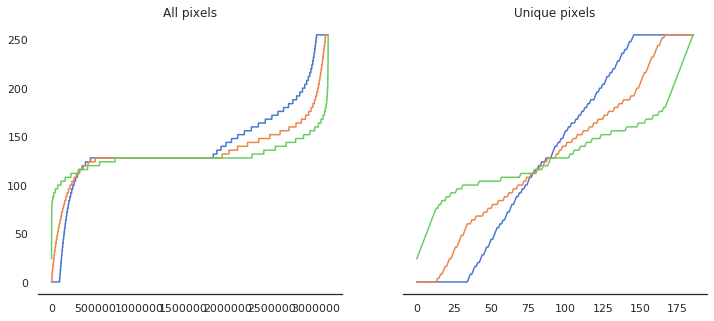

In [42]:
# Plot color distribution of oroginal image
fig, ax = plt.subplots(1,2, figsize=(12, 5), sharey=True)
sns.despine(left=True)
ax[0].plot(arr_pixel_sorted)
ax[0].set_title("All pixels")

ax[1].plot(df_pixel[["R", "G", "B"]].to_numpy())
ax[1].set_title("Unique pixels")

In [43]:
# Get R, G, B stats mean and sd
print(df_pixel.mean())
print(df_pixel.std())
print(df_pixel.var())
print(df_pixel.max()-df_pixel.min())
#print("Spread", np.ptp(arr_pixel_sorted, axis=0))

R           133.684492
G           130.844920
B           131.139037
counts    16822.074866
any0          0.187166
dtype: float64
R            97.346692
G            78.071738
B            44.520769
counts    82905.208260
any0          0.391092
dtype: float64
R         9.476378e+03
G         6.095196e+03
B         1.982099e+03
counts    6.873274e+09
any0      1.529527e-01
dtype: float64
R             255.0
G             255.0
B             231.0
counts    1114273.0
any0            1.0
dtype: float64


# Here we start modifying the image

In [44]:
df_pixel["max-min"] = df_pixel[["R", "G", "B"]].apply(lambda x: max(x)-min(x), axis=1)
df_pixel["paiwise"] = df_pixel[["R", "G", "B"]].apply(lambda x: np.diff(np.diff(x))[-1], axis=1)
df_pixel.head()

,R,G,B,counts,any0,max-min,paiwise
0,0,0,24,2,True,24,24
1,0,0,28,1,True,28,28
2,0,0,32,2,True,32,32
3,0,0,36,4,True,36,36
4,0,0,40,4,True,40,40


In [84]:
# Get the elements with the smallest difference (those that are closests to be gray)
to_remove = df_pixel.loc[df_pixel.loc[:,"max-min"]==0]
print(to_remove.head())

# Iterate over the elements to remove
arr_new = copy.deepcopy(arr_pixel)
for i in to_remove[rgb].to_numpy()[2]:
    arr_new = np.where(arr_pixel==i, [0,0,0], arr_pixel)

       R    G    B   counts   any0  max-min  paiwise
78   112  112  112     9603  False        0        0
81   116  116  116    29854  False        0        0
90   128  128  128  1114274  False        0        0
186  255  255  255      600  False        0        0


(1536, 2048, 3)


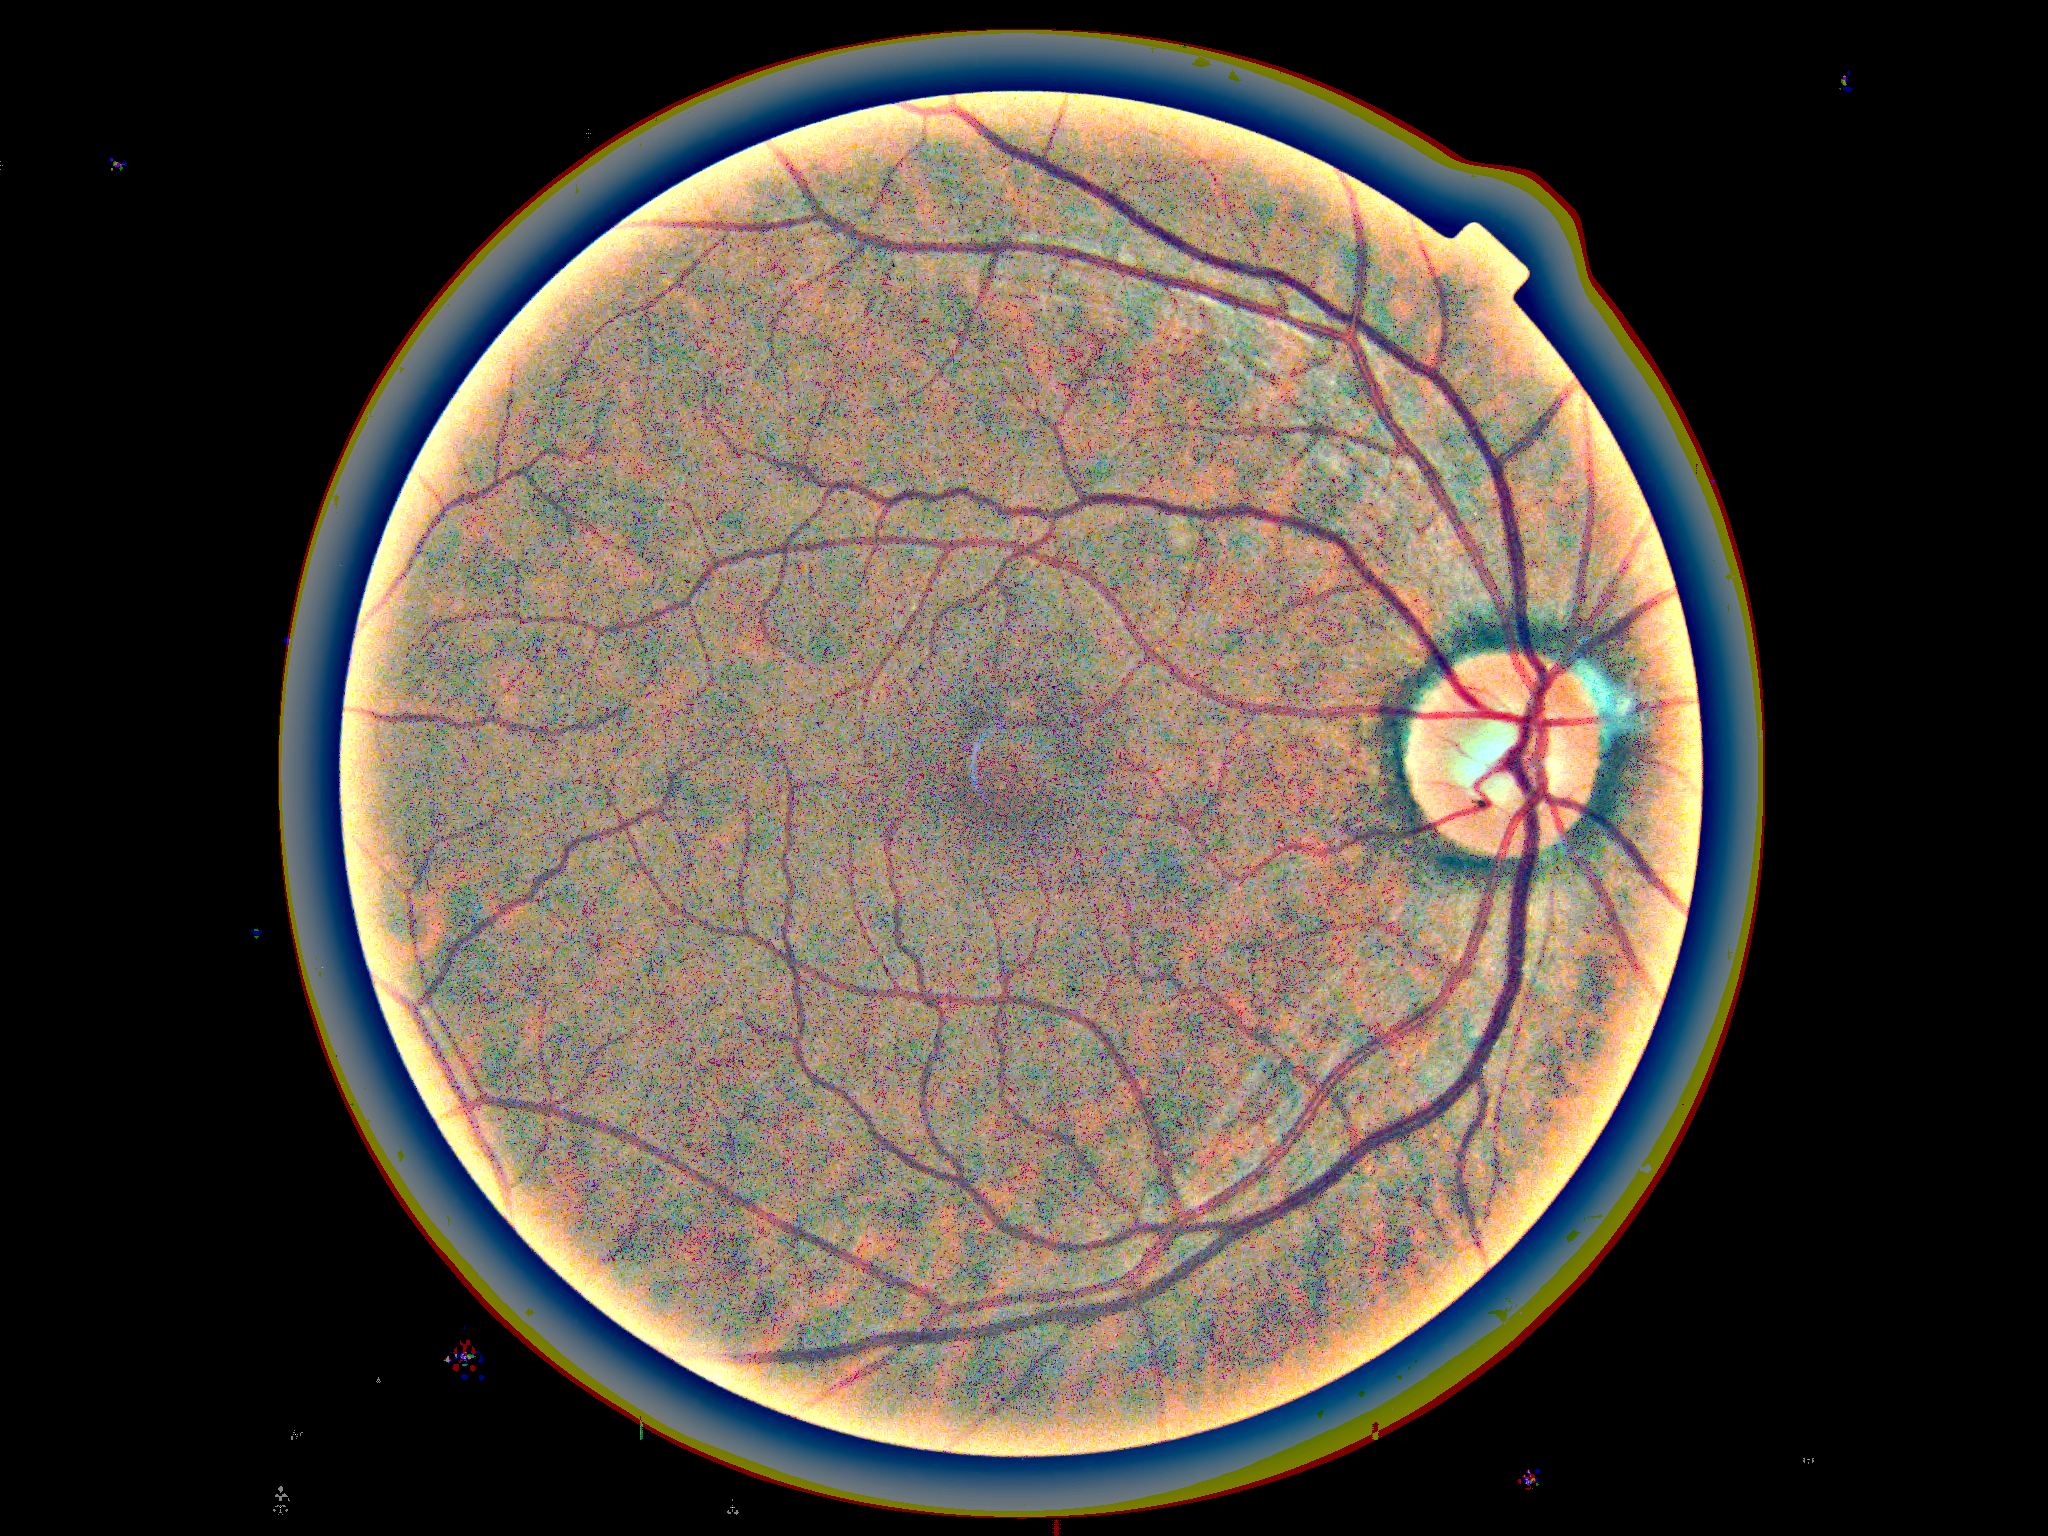

In [85]:
# Generate new image
newimage = np.resize(arr_new, im_shape).astype(np.uint8)
print(newimage.shape)
Image.fromarray(newimage)

Text(0.5, 1.0, 'Unique pixels')

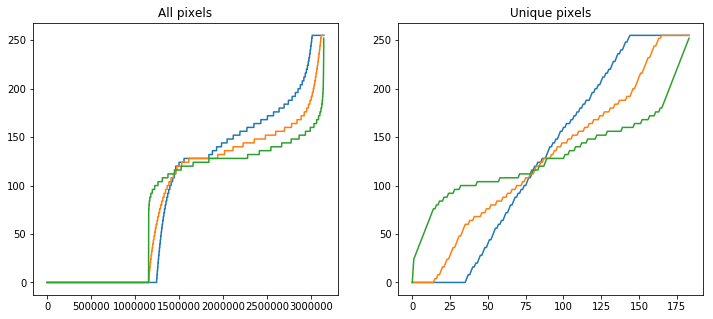

In [212]:
arr_pixel_wogray_sorted = np.sort(arr_pixel_sorted, axis=0)
pixel_wogray_unique, pixel_wogray_counts = np.unique(arr_pixel_wogray_sorted, return_counts=True, axis=0)
fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].plot(arr_pixel_wogray_sorted)
ax[0].set_title("All pixels")
ax[1].plot(pixel_wogray_unique)
ax[1].set_title("Unique pixels")

In [213]:
# Reshape array to fig size
arr_wogray = np.resize(arr_pixel, im_arr_rgb.shape)

# Convert array to image
im_wogray = Image.fromarray(arr_wogray)
im_wogray.show()

In [ ]:
e,c = np.unique(np.sort(np.resize(nbckg_b, (3145728,1))), axis=0, return_counts=True)
f, ax = plt.subplots(figsize=(7, 6))
sns.kdeplot(elements[2], ax=ax)
sns.kdeplot(e, ax=ax)

In [ ]:
print(elements[2])

In [ ]:
# First possible mask
# Substract B from R and G channels
nr = Image.fromarray(im_arr_r - im_arr_b//2)
ng = Image.fromarray(im_arr_g - im_arr_b//2)
nb = Image.fromarray(im_arr_b - im_arr_b//2)

# Getting image together
tim = PIL.Image.merge("RGB", (nr, ng, nb))
tim.show()


# Second possible mask
# Substract B from R and G channels
nr = Image.fromarray(im_arr_r + np.mean(im_arr_b,dtype=int))
ng = Image.fromarray(im_arr_g - nr)
nb = Image.fromarray(im_arr_b - nr)

# Getting image together
tim = PIL.Image.merge("RGB", (nr, ng, nb))
tim.show()

In [172]:
# Create a random dataset across several variables
rs = np.random.RandomState(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

In [175]:
d

array([[ 1.35281047e+01,  7.33457851e+00,  6.46441452e+00,
         7.55031459e+00,  5.68792642e+00, -9.13353106e-01,
         2.17062609e+00, -6.99922125e-01],
       [ 9.79356230e+00,  7.35546110e+00,  4.79502570e+00,
         5.97707521e+00,  3.47488589e+00,  1.28455269e+00,
         1.15817572e+00,  2.70140946e-01],
       [ 1.29881581e+01,  6.12394757e+00,  5.13307396e+00,
         1.36033672e+00, -3.15316919e+00,  2.34843984e+00,
         1.99932165e+00, -1.88153775e+00],
       [ 1.45395092e+01,  3.62553275e+00,  4.59845559e+00,
         2.69416049e+00,  5.01836887e+00,  3.97992019e+00,
         5.80344106e-01,  3.59117331e-01],
       [ 8.22442850e+00,  2.57267116e+00,  3.81111426e+00,
         3.38122613e+00,  4.41339180e+00,  3.44596235e+00,
        -5.04204380e-01, -1.00181321e+00],
       [ 7.90289407e+00,  3.69422822e+00,  1.09439818e+00,
         6.97007898e+00,  9.33506074e-01,  1.65054051e-01,
        -2.23514147e+00,  1.15777300e+00],
       [ 6.77220430e+00,  6.108783